In [130]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [65]:
import hdf5storage
import cv2
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

## PART 1: Loading and Preprocessing Dataset

### Training Dataset

In [66]:
# Load Data from matlab file
def load_train_data(label_file):
    out = hdf5storage.loadmat(label_file)
    img_urls = []
    labels = []
    record = out['label_train'][0]

    for item in record:
        img_urls.append(item[1][0])
        labels.append([v for v in item[2].astype(int)])
        
    return img_urls, labels

# Parse Labels
def parse_train_labels(raw_labels):
    labels = []
    for raw_label in raw_labels:
        raw_label = raw_label[0]
        labels.append(
            {
                'face': [raw_label[0], raw_label[1], raw_label[2], raw_label[3]],
                'eyes': [raw_label[4], raw_label[5], raw_label[6], raw_label[7]],
                'occlude_location': [raw_label[8], raw_label[9], raw_label[10], raw_label[11]],
                'occlude_type': raw_label[12],
                'occlude_degree': raw_label[13],
                'gender': raw_label[14],
                'race': raw_label[15],
                'orientation': raw_label[16],
                'glass': [raw_label[17], raw_label[18], raw_label[19], raw_label[20]]
            }
        )
    return labels

# Create Dataframe
def to_dataframe(imgs, labels):
    df_labels = pd.DataFrame(labels)
    df_img = pd.DataFrame(imgs)
    df_img.columns = ['img']
    
    return pd.concat([df_img, df_labels], axis=1)


In [ ]:
img, labels = load_train_data('train/LabelTrainAll.mat')
labels

In [67]:
img, labels = load_train_data('train/LabelTrainAll.mat')
train_labels = parse_train_labels(labels)
df_train = to_dataframe(img, train_labels)
df_train.sample(20)

,img,face,eyes,occlude_location,occlude_type,occlude_degree,gender,race,orientation,glass
14465,train_00014466.jpg,"[39, 146, 123, 123]","[67, 173, 122, 178]","[6, 44, 112, 129]",2,3,1,2,3,"[-1, -1, -1, -1]"
4180,train_00004181.jpg,"[67, 9, 91, 91]","[104, 36, 149, 39]","[27, 54, 88, 87]",3,2,1,2,3,"[-1, -1, -1, -1]"
8429,train_00008430.jpg,"[19, 20, 63, 63]","[35, 36, 60, 38]","[-10, 26, 53, 61]",1,3,2,2,3,"[-1, -1, -1, -1]"
2425,train_00002426.jpg,"[866, 125, 122, 122]","[894, 152, 941, 155]","[13, 85, 113, 120]",1,1,1,2,3,"[-1, -1, -1, -1]"
24785,train_00024786.jpg,"[64, 4, 94, 94]","[91, 12, 138, 17]","[9, 24, 81, 91]",2,3,2,2,3,"[10, 1, 86, 36]"
21165,train_00021166.jpg,"[231, 219, 103, 103]","[262, 244, 316, 255]","[1, 38, 102, 101]",1,3,2,2,3,"[-1, -1, -1, -1]"
2711,train_00002712.jpg,"[231, 276, 678, 678]","[422, 458, 662, 462]","[17, 228, 631, 655]",1,3,2,2,3,"[-1, -1, -1, -1]"
4984,train_00004985.jpg,"[193, 161, 204, 204]","[274, 237, 336, 206]","[22, 56, 182, 210]",2,3,2,2,4,"[-1, -1, -1, -1]"
10150,train_00010151.jpg,"[43, 11, 95, 95]","[73, 37, 104, 44]","[14, 60, 64, 81]",1,2,2,2,3,"[-1, -1, -1, -1]"
4426,train_00004427.jpg,"[221, 191, 104, 104]","[239, 216, 258, 214]","[9, 34, 96, 100]",1,3,2,2,2,"[-1, -1, -1, -1]"


We will add a Class that is:
- occlude degree = 3    and occlude type = 1 or 2 ---> MASK
- Otherwise --> No Mask

In [68]:
# Creating Class Columns (Label)
df = df_train
df_train['class'] = np.where((
                    df['occlude_type'] <= 2) & (df['occlude_degree'] == 3), 'full_mask',
                    'no mask')
df_train.head(10)

,img,face,eyes,occlude_location,occlude_type,occlude_degree,gender,race,orientation,glass,class
0,train_00000001.jpg,"[95, 160, 91, 91]","[113, 177, 158, 172]","[7, 26, 82, 89]",1,3,1,1,3,"[-1, -1, -1, -1]",full_mask
1,train_00000002.jpg,"[107, 82, 66, 66]","[129, 95, 156, 96]","[5, 17, 65, 56]",2,3,1,1,3,"[-1, -1, -1, -1]",full_mask
2,train_00000003.jpg,"[56, 170, 185, 185]","[140, 198, 196, 208]","[41, 56, 147, 182]",1,3,1,1,4,"[-1, -1, -1, -1]",full_mask
3,train_00000004.jpg,"[162, 208, 71, 71]","[182, 229, 203, 238]","[7, 26, 46, 70]",2,3,1,1,2,"[-1, -1, -1, -1]",full_mask
4,train_00000005.jpg,"[86, 69, 99, 99]","[134, 93, 165, 98]","[6, 70, 76, 97]",1,1,2,1,4,"[-1, -1, -1, -1]",no mask
5,train_00000006.jpg,"[79, 73, 71, 71]","[112, 84, 138, 101]","[4, 44, 54, 69]",1,1,2,3,3,"[-1, -1, -1, -1]",no mask
6,train_00000007.jpg,"[137, 84, 74, 74]","[153, 98, 189, 98]","[4, 23, 70, 71]",1,3,2,3,3,"[-1, -1, -1, -1]",full_mask
7,train_00000008.jpg,"[6, 32, 166, 166]","[61, 68, 121, 75]","[45, 88, 159, 160]",3,2,1,3,3,"[-1, -1, -1, -1]",no mask
8,train_00000009.jpg,"[107, 180, 74, 74]","[124, 201, 155, 198]","[7, 35, 70, 70]",1,2,2,1,3,"[-1, -1, -1, -1]",no mask
9,train_00000010.jpg,"[123, 109, 172, 172]","[157, 160, 232, 164]","[4, 110, 135, 166]",3,2,1,1,3,"[-1, -1, -1, -1]",no mask


In [113]:
import random
x = random.randint(0, 1000)
img_url = df_train['img'][x]
occ_type = df_train['occlude_type'][x]
occ_degree = df_train['occlude_degree'][x]

print("Occ Type: ", occ_type)
print("Occ Degree: ", occ_degree)


img = cv2.imread('train/images/' + img_url)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Occ Type:  1
Occ Degree:  2


### Testing Dataset

In [ ]:
# Load Data from matlab file
def load_test_data(label_file):
    out = hdf5storage.loadmat(label_file)
    img_urls = []
    labels = []
    record = out['LabelTest'][0]

    for item in record:
        img_urls.append(item[0][0])
        labels.append([v for v in item[1].astype(int)])

    return img_urls, labels

# Parse Labels
def parse_test_labels(raw_labels):
    labels = []
    for raw_label in raw_labels:
        raw_label = raw_label[0]
        labels.append(
            {
                'face': [raw_label[0], raw_label[1], raw_label[2], raw_label[3]],
                'face_type': raw_label[4],
                'occlude_location': [raw_label[5], raw_label[6], raw_label[7], raw_label[8]],
                'occlude_type': raw_label[9],
                'occlude_degree': raw_label[10],
                'gender': raw_label[11],
                'race': raw_label[12],
                'orientation': raw_label[13],
                'glass': [raw_label[14], raw_label[15], raw_label[16], raw_label[17]]
            }
        )
    return labels

# Create Dataframe
def to_dataframe(imgs, labels):
    df_labels = pd.DataFrame(labels)
    df_img = pd.DataFrame(imgs)
    df_img.columns = ['img']

    return pd.concat([df_img, df_labels], axis=1)


In [ ]:
img, labels = load_test_data('test/LabelTestAll.mat')
test_labels = parse_test_labels(labels)
df_test = to_dataframe(img, test_labels)
df_test.sample(20)

In [ ]:
# Creating Class Columns (Label)
df = df_test
df_test['class'] = np.where((
                    df['occlude_type'] <= 2) & (df['occlude_degree'] == 3), 'full_mask',
                    'no mask')
df_test.head(10)

In [ ]:
print(df_test['class'].value_counts())
df_test['class'].value_counts().plot(kind='bar')

In [ ]:
# Checking Images Randomly
import random
df_temp = df_train[df_train['class'] == 'no mask'].reset_index()
for i in range(15):
    x = random.randint(0, 1000)

    img = df_temp['img'][x]
    occ_type = df_temp['occlude_type'][x]
    occ_deg = df_temp['occlude_degree'][x]
    c = df_temp['class'][x]


    frame = cv2.imread('train/images/' + img)
    print(f"Occ Type {occ_type}     Occ Degree {occ_deg}     Class {c}")
    cv2.imshow('img', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Part 2: Preparing Images and Dataset Directories

### Cropping Images (Taking only Faces)

In [ ]:
# Cropping the Faces from the Images and save them in new folder
try:
    os.makedirs('train/images_cropped')
except:
    pass


for ind, row in df_train.iterrows():
    img_url = row['img']
    face = row['face']
    [x,y,w,h] = face
    
    img = cv2.imread('train/images/' + img_url)
    cropped_image = img[y:y+h, x:x+w]
    cv2.imwrite('train/images_cropped/' + img_url, cropped_image)

print("Saved all Train Dataset Cropped Images")


In [ ]:
try:
    os.makedirs('test/images_cropped')
except:
    pass


for ind, row in df_test.iterrows():
    img_url = row['img']
    face = row['face']
    [x,y,w,h] = face

    img = cv2.imread('test/images/' + img_url)
    cropped_image = img[y:y+h, x:x+w]
    cv2.imwrite('test/images_cropped/' + img_url, cropped_image)

print("Saved all Test Dataset Cropped Images")

### Creating Dataset Directories

In [ ]:
# Creating the train Directories
classes = df_train['class'].unique().tolist()

for c in classes:
    try:
        os.makedirs('train/images_cropped/'+ c)
    except:
        pass

# Copy Images to their classes directories
for ind, row in tqdm(df_train.iterrows()):
    class_name = row['class']
    img_name = row['img']

    src_name = 'train/images_cropped/' + img_name
    dst_name = 'train/images_cropped/' + class_name + '/' + img_name

    shutil.move(src_name, dst_name)

print("Copied all Train Images to Their Directories...")

In [ ]:
classes = df_test['class'].unique().tolist()

for c in classes:
    try:
        os.makedirs('test/images_cropped/'+ c)
    except:
        pass

# Copy Images to their classes directories
for ind, row in tqdm(df_test.iterrows()):
    class_name = row['class']
    img_name = row['img']

    src_name = 'test/images_cropped/' + img_name
    dst_name = 'test/images_cropped/' + class_name + '/' + img_name

    shutil.move(src_name, dst_name)

print("Copied all Test Images to Their Directories...")

## Part 3: Training the Model

In [114]:
# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, AveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # To Augment Images or we can use GANs
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import load_model

# sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [115]:
train_dir = 'train/images_cropped'
validation_dir = 'test/images_cropped'

BATCH_SIZE = 32
IMG_SIZE = (160, 160)
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                           )

Found 25876 files belonging to 2 classes.


In [116]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                )

Found 4935 files belonging to 2 classes.


In [117]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [118]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [121]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [122]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [123]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [124]:
base_model.trainable = False
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [125]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

prediction_layer = tf.keras.layers.Dense(1)
# prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

(32, 1280)
(32, 1)


In [126]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [129]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
809/809 [==============================] - 53s 65ms/step - loss: 0.2129 - accuracy: 0.9168 - val_loss: 0.2076 - val_accuracy: 0.9165
Epoch 2/20
809/809 [==============================] - 54s 67ms/step - loss: 0.2124 - accuracy: 0.9165 - val_loss: 0.2083 - val_accuracy: 0.9147
Epoch 3/20
809/809 [==============================] - 56s 69ms/step - loss: 0.2137 - accuracy: 0.9157 - val_loss: 0.2066 - val_accuracy: 0.9183
Epoch 4/20
809/809 [==============================] - 57s 70ms/step - loss: 0.2103 - accuracy: 0.9175 - val_loss: 0.2053 - val_accuracy: 0.9191
Epoch 5/20
809/809 [==============================] - 58s 71ms/step - loss: 0.2082 - accuracy: 0.9186 - val_loss: 0.2045 - val_accuracy: 0.9189
Epoch 6/20
809/809 [==============================] - 58s 72ms/step - loss: 0.2068 - accuracy: 0.9195 - val_loss: 0.2049 - val_accuracy: 0.9189
Epoch 7/20
809/809 [==============================] - 58s 71ms/step - loss: 0.2086 - accuracy: 0.9170 - val_loss: 0.2030 - val_accuracy:

In [ ]:
model.save('mobileNetv2_MAFA_model_mask_nomask_V2_Dense1.h5')

[0.8305765986442566, 0.8838305473327637, 0.8988637924194336, 0.9033467173576355, 0.9065157175064087, 0.9103416204452515, 0.9120033979415894, 0.9125831127166748, 0.912389874458313, 0.9135492444038391]


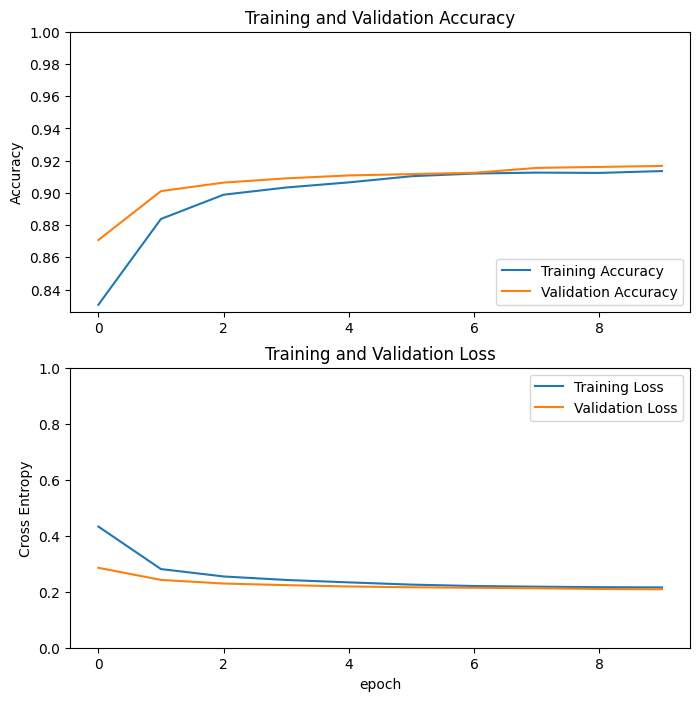

In [128]:
import matplotlib.pyplot as plt
acc = (history.history['accuracy'])
val_acc = history.history['val_accuracy']

print(acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Evaluating the Model on Test dataset

In [ ]:
import numpy as np
# Model Evaluation
test_data = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                )
predictions = model.predict(test_data)
predIdx = np.argmax(predictions, axis=1)
# predIdx
test_data.class_names
# ground_truth_labels = test_data.
# confusion_matrix = tf.math.confusion_matrix(ground_truth_labels, predictions)
# confusion_matrix


In [ ]:
import cv2
img = cv2.imread(validation_dir + "/full_mask/test_00000005.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

face_resized = cv2.resize(img, (160, 160))
frame_arr = np.expand_dims(face_resized, axis=0)
pred = model.predict(frame_arr)
# Apply a sigmoid since our model returns logits
pred = tf.nn.sigmoid(pred)
print(pred)
pred = tf.where(pred < 0.5, 0, 1)

# print('Predictions:\n', predictions.numpy())
# print('Labels:\n', label_batch)
pred.numpy()


In [ ]:
img = cv2.imread(validation_dir + "/no mask/test_00000706.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

face_resized = cv2.resize(img, (160, 160))
frame_arr = np.expand_dims(face_resized, axis=0)
pred = model.predict(frame_arr)
# Apply a sigmoid since our model returns logits
pred = tf.nn.sigmoid(pred)
pred = tf.where(pred < 0.5, 0, 1)

# print('Predictions:\n', predictions.numpy())
# print('Labels:\n', label_batch)
pred.numpy()

In [ ]:
true_labels = []
pred_labels = []

classes = ['full_mask', 'no mask']

for c in classes:
    print("-----------", c, "-----------")
    directory = validation_dir + "/" + c
    for img_url in os.listdir(directory):
        # Load image
        img = cv2.imread(directory + "/" + img_url)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        face_resized = cv2.resize(img, (160, 160))
        frame_arr = np.expand_dims(face_resized, axis=0)
        pred = model.predict(frame_arr)
        # Apply a sigmoid since our model returns logits
        pred = tf.nn.sigmoid(pred)
        pred = tf.where(pred < 0.5, 0, 1)
        pred_labels.append(pred.numpy()[0][0])
        if c == "full_mask":
            true_labels.append(0)
        else:
            true_labels.append(1)
    print(c, "Class Finished Testing..")



In [ ]:
import numpy as np

# Get the number of classes.
num_classes = len(np.unique(true_labels))

# Create the confusion matrix.
confusion_matrix = np.zeros((num_classes, num_classes))

# Iterate over the predictions and true labels.
for prediction, true_label in zip(pred_labels, true_labels):
    # Increment the confusion matrix at the corresponding indices.
    confusion_matrix[prediction, true_label] += 1

# Print the confusion matrix.
print(confusion_matrix)


In [ ]:
from sklearn.metrics import accuracy_score

# Compute the accuracy
accuracy = accuracy_score(true_labels, pred_labels)

print("Accuracy:", accuracy)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix
classes = ["Full Mask", "No Mask"]
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = confusion_mtx.max() / 2.
for i, j in np.ndindex(confusion_mtx.shape):
    plt.text(j, i, format(confusion_mtx[i, j], fmt),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [54]:
img = cv2.imread(validation_dir + "/no mask/test_00000706.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

face_resized = cv2.resize(img, (160, 160))
frame_arr = np.expand_dims(face_resized, axis=0)
pred = model.predict(frame_arr)
# Apply a sigmoid since our model returns logits
pred = tf.nn.sigmoid(pred)
pred = tf.where(pred < 0.5, 0, 1)

# print('Predictions:\n', predictions.numpy())
# print('Labels:\n', label_batch)
pred.numpy()

1/1 [==============================] - 0s 20ms/step


array([[1]])

In [56]:
true_labels = []
pred_labels = []

classes = ['full_mask', 'no mask']

for c in classes:
    print("-----------", c, "-----------")
    directory = validation_dir + "/" + c
    for img_url in os.listdir(directory):
        # Load image
        img = cv2.imread(directory + "/" + img_url)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        face_resized = cv2.resize(img, (160, 160))
        frame_arr = np.expand_dims(face_resized, axis=0)
        pred = model.predict(frame_arr)
        # Apply a sigmoid since our model returns logits
        pred = tf.nn.sigmoid(pred)
        pred = tf.where(pred < 0.5, 0, 1)
        pred_labels.append(pred.numpy()[0][0])
        if c == "full_mask":
            true_labels.append(0)
        else:
            true_labels.append(1)
    print(c, "Class Finished Testing..")



----------- full_mask -----------
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 4ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 4ms/step
full_mask Class Finished Testing..
----------- no mask -----------
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step
no mask Class Finished Testing..


In [57]:
import numpy as np

# Get the number of classes.
num_classes = len(np.unique(true_labels))

# Create the confusion matrix.
confusion_matrix = np.zeros((num_classes, num_classes))

# Iterate over the predictions and true labels.
for prediction, true_label in zip(pred_labels, true_labels):
    # Increment the confusion matrix at the corresponding indices.
    confusion_matrix[prediction, true_label] += 1

# Print the confusion matrix.
print(confusion_matrix)


[[3762.  294.]
 [ 118.  761.]]


In [60]:
from sklearn.metrics import accuracy_score

# Compute the accuracy
accuracy = accuracy_score(true_labels, pred_labels)

print("Accuracy:", accuracy)


Accuracy: 0.916514690982776


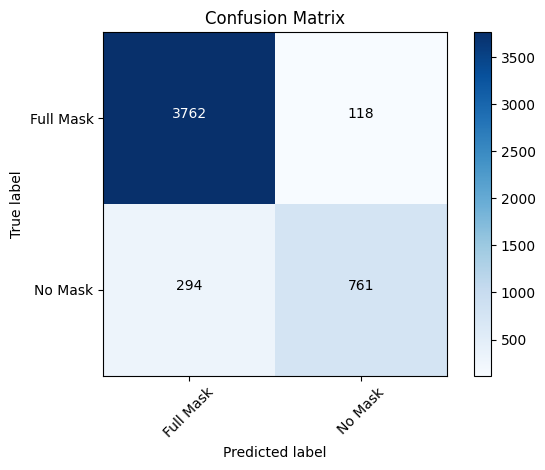

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix
classes = ["Full Mask", "No Mask"]
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = confusion_mtx.max() / 2.
for i, j in np.ndindex(confusion_mtx.shape):
    plt.text(j, i, format(confusion_mtx[i, j], fmt),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
